In [1]:
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import sys
import argparse
from model import get_model, get_loss, get_optimizer
from image_to_train import bands_to_image, display_image, unpack_numpy_subimages, preprocess_single_train

2024-02-20 00:12:26.607993: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load and Test Model With Test Images

In [47]:
loaded_model = get_model()
loaded_model.load_weights(os.path.join('saved_weights', 'cos_model100_100'))

In [48]:
test_image = tf.io.read_file(os.path.join('Testx2Color', '0901x2.png'))
test_image = tf.io.decode_png(test_image)
test_train = preprocess_single_train(test_image)
init_test_x = test_train[0]
init_test_y = test_train[1]

In [49]:
# display_image(bands_to_image(init_test_x+init_test_y))

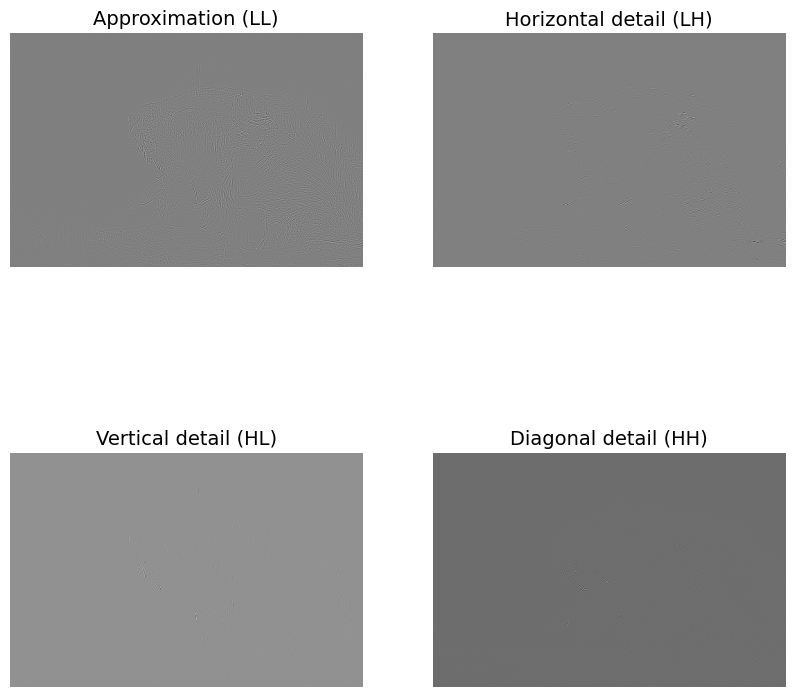

In [50]:
test_x = np.moveaxis(init_test_x, 0, -1)
test_x = tf.expand_dims(test_x, axis=0)

test_out = loaded_model(test_x)
test_out = tf.squeeze(test_out)
test_out =np.moveaxis(test_out, -1, 0)
display_image(test_out)

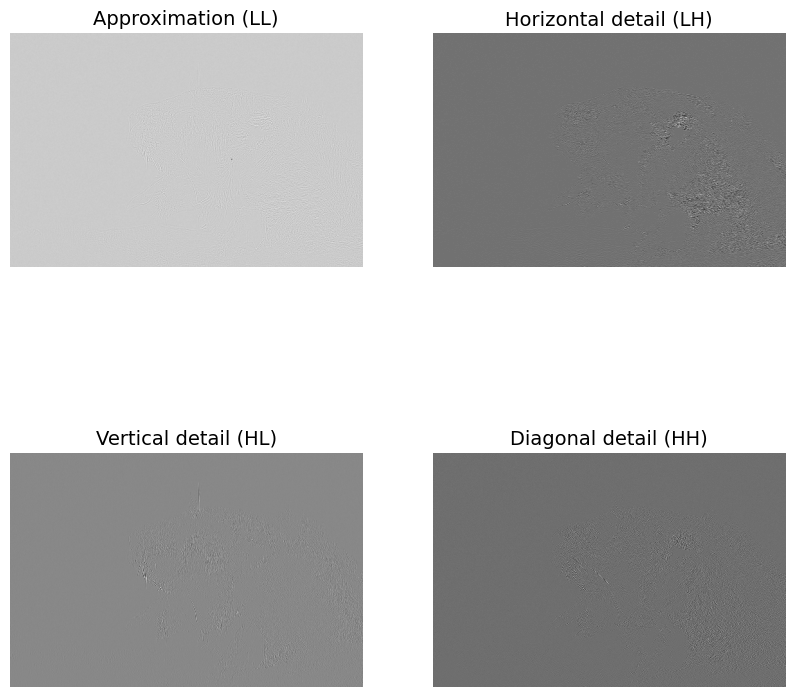

In [51]:
display_image(init_test_y)

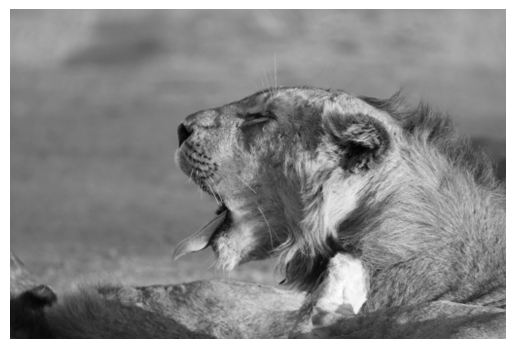

In [52]:
# low res image
lowres = bands_to_image(init_test_x)
display_image(lowres)

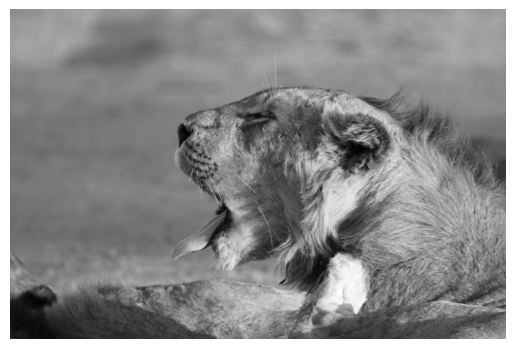

In [53]:
# SR image
SR = bands_to_image(init_test_x+test_out)
display_image(SR)

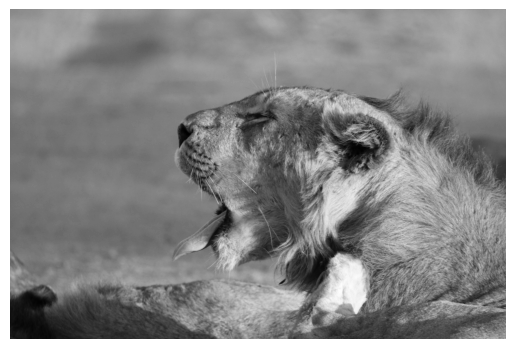

In [54]:
# high res image
highres = bands_to_image(init_test_x+init_test_y)
display_image(highres)

In [46]:
# checking PNSR
print('PSNR lr: ',tf.image.psnr(lowres[..., tf.newaxis], highres[..., tf.newaxis], max_val=1.0).numpy())
print('PSNR sr: ', tf.image.psnr(SR[..., tf.newaxis], highres[..., tf.newaxis], max_val=1.0).numpy())

# checking SSIM
print('ssim lr:', tf.image.ssim(lowres[..., tf.newaxis], highres[..., tf.newaxis], max_val=1.0).numpy())
print('ssim sr:', tf.image.ssim(SR[..., tf.newaxis], highres[..., tf.newaxis], max_val=1.0).numpy())

PSNR lr:  35.46879
PSNR sr:  36.064415
ssim lr: 0.93932897
ssim sr: 0.946346


In [55]:
print('PSNR lr: ',tf.image.psnr(lowres[..., tf.newaxis], highres[..., tf.newaxis], max_val=1.0).numpy())
print('PSNR sr: ', tf.image.psnr(SR[..., tf.newaxis], highres[..., tf.newaxis], max_val=1.0).numpy())

# checking SSIM
print('ssim lr:', tf.image.ssim(lowres[..., tf.newaxis], highres[..., tf.newaxis], max_val=1.0).numpy())
print('ssim sr:', tf.image.ssim(SR[..., tf.newaxis], highres[..., tf.newaxis], max_val=1.0).numpy())

PSNR lr:  35.46879
PSNR sr:  36.08268
ssim lr: 0.93932897
ssim sr: 0.94641954
